# Multi Stock Analysis

Let's work with some multiple stock panel data now. We'll use the same libraries as before, but we'll also introduce `seaborn` - another increasingly popular visualisation library. Again, we'll start with all of our imports.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # <- would you have guessed sns ?

plt.style.use("ggplot")

Let's load the panel data as normal.

In [4]:
df = pd.read_csv("../data/top_six_2020_2025.csv")
df.DlyCalDt = pd.to_datetime(df.DlyCalDt, dayfirst=True)
df

,DlyCalDt,Ticker,DlyClose,DlyHigh,DlyLow,DlyOpen,DlyVolume
0,2020-01-02,AAPL,72.620834,72.681281,71.373211,71.627084,135480400
1,2020-01-03,AAPL,71.914818,72.676447,71.689957,71.847118,146322800
2,2020-01-06,AAPL,72.487839,72.526526,70.783241,71.034702,118387200
3,2020-01-07,AAPL,72.146927,72.753808,71.926900,72.497514,108872000
4,2020-01-08,AAPL,73.307503,73.609737,71.849525,71.849525,132079200
...,...,...,...,...,...,...,...
7537,2024-12-23,NVDA,139.657150,139.777134,135.107566,136.267463,176053500
7538,2024-12-24,NVDA,140.207108,141.886946,138.637245,139.987127,105157000
7539,2024-12-26,NVDA,139.917130,140.837058,137.717335,139.687155,116205600
7540,2024-12-27,NVDA,136.997391,139.007216,134.697615,138.537258,170582600


Let's say we wanted to visualise the closing prices of all the stocks in our data set. Reshaping our **long** data to **wide** makes plotting *really* straightforward.

*(Note this doesn't follow the best practice of using object oriented Matplotlib, but it's very cool)*

Ticker            AAPL        AMZN       GOOGL        META        MSFT  \
DlyCalDt                                                                 
2020-01-02   72.620834   94.900497   68.026016  208.795944  153.042328   
2020-01-03   71.914818   93.748497   67.670143  207.691147  151.136658   
2020-01-06   72.487839   95.143997   69.473846  211.602722  151.527298   
2020-01-07   72.146927   95.343002   69.339645  212.060547  150.145737   
2020-01-08   73.307503   94.598503   69.833183  214.210419  152.537277   
...                ...         ...         ...         ...         ...   
2024-12-23  254.655716  225.059998  194.171051  599.316772  433.583038   
2024-12-24  257.578674  229.050003  195.647552  607.209778  437.647369   
2024-12-26  258.396667  227.050003  195.138763  602.813660  436.432068   
2024-12-27  254.974930  223.750000  192.305450  599.276855  428.881104   
2024-12-30  251.593079  221.300003  190.789032  590.714417  423.202911   

Ticker            NVDA  
DlyCalDt    

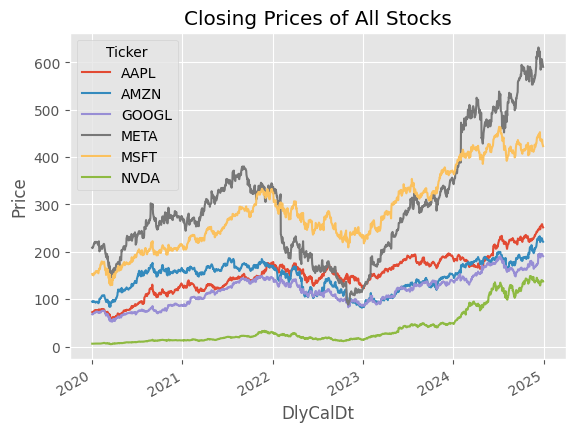

In [5]:
pivot_df = df.pivot(index="DlyCalDt", columns='Ticker', values='DlyClose')
print(pivot_df)

pivot_df.plot()
plt.title('Closing Prices of All Stocks')
plt.ylabel('Price')
plt.show()

To understand the relationship between the daily returns of different stocks, we've previously used a correlation matrix. After finding daily returns and calculating the correlation with `corr()`,  we can use `seaborn`'s `heatmap()` to visualise it.


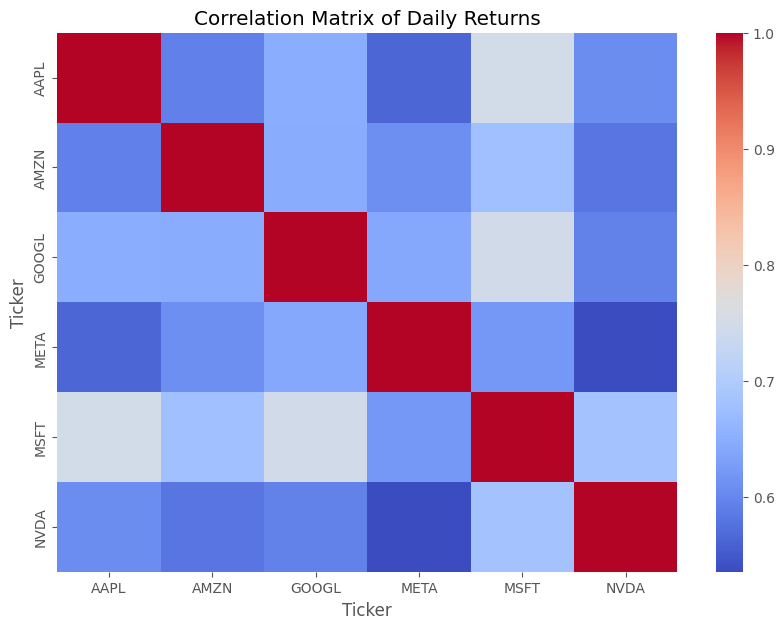

In [6]:
correlation_matrix = pivot_df.pct_change().corr()

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Daily Returns')
plt.show()

We create a regression plot for AAPL's volume traded versus its closing price. This can help visualise if there's any relationship between the returns of two companies. We use seaborn's regplot function which creates a scatter plot and fits a regression line.

In simple regression, we consider two variables - independent (x) and dependent (y). A regression analysis helps us understand how the dependent variable changes with respect to the independent variable.


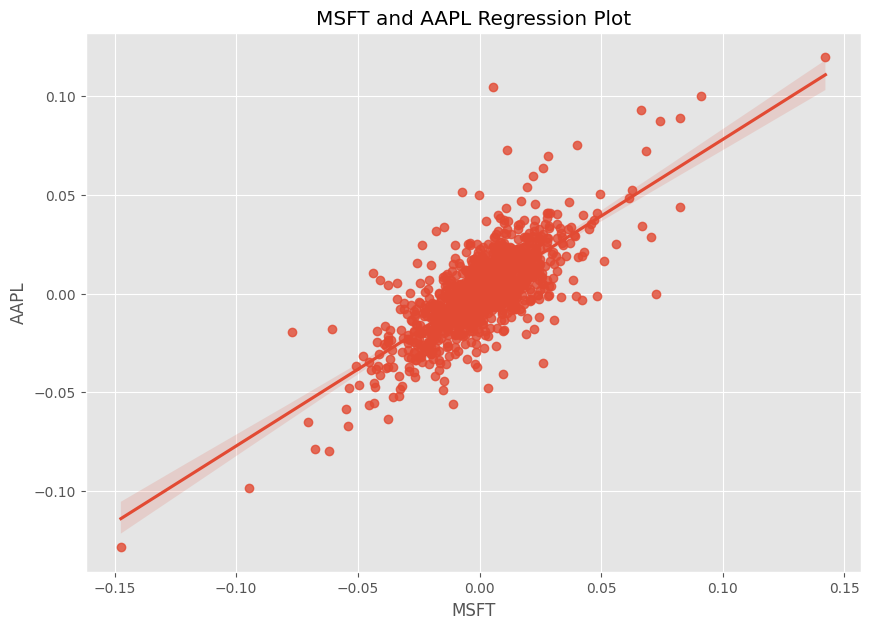

In [7]:
returns_matrix = pivot_df.pct_change()

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x=returns_matrix.MSFT, y=returns_matrix.AAPL, ax=ax)
ax.set_title('MSFT and AAPL Regression Plot')
ax.set_xlabel('MSFT')
ax.set_ylabel('AAPL')
plt.show()

### Exercise: Double Regression

Use subplots to create two regression plots side by side. One should show a strong relationship and the other should show a weak relationship. Refer to the correlation matrix to determine these.

In [ ]:
## YOUR CODE GOES HERE
